## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#Metrics/Split
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc, accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

## Features Engineering

In [27]:
df = pd.read_csv('/content/neo_v2.csv')
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [28]:
df = df.drop(columns = ['id','name','orbiting_body','sentry_object'])
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


In [29]:
#Convert target class to binary
df['hazardous'] = [0 if entry==False else 1 for entry in df['hazardous']]

In [6]:
#Analyze class bias
bias = df['hazardous'].sum() / df['hazardous'].count()
print('% Hazardous Asteroids: ',round(bias,3))
print('% Non-Hazardous Asteroids: ',round(1-bias,3))

% Hazardous Asteroids:  0.097
% Non-Hazardous Asteroids:  0.903


> => data belonging to 2 labels is not balanced, should not trust absolute in accuracy

In [30]:
#Prepping data for model fitting
X = df.drop('hazardous',axis=1)
y = df['hazardous']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [18]:
print("Trainset: ", X_train.shape, y_train.shape)
print("Testset: ", X_test.shape, y_test.shape)

Trainset:  (72668, 5) (72668,)
Testset:  (18168, 5) (18168,)


In [32]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print(classification_report(y_test,y_pred,zero_division = 0))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     16404
           1       0.00      0.00      0.00      1764

    accuracy                           0.90     18168
   macro avg       0.45      0.50      0.47     18168
weighted avg       0.82      0.90      0.86     18168



In [33]:
nb = BernoulliNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print(classification_report(y_test,y_pred,zero_division = 0))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     16404
           1       0.00      0.00      0.00      1764

    accuracy                           0.90     18168
   macro avg       0.45      0.50      0.47     18168
weighted avg       0.82      0.90      0.86     18168



In [35]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train,y_train)
KNNpreds = KNN.predict(X_test)
print(classification_report(y_test,KNNpreds))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     16404
           1       0.18      0.01      0.02      1764

    accuracy                           0.90     18168
   macro avg       0.54      0.50      0.48     18168
weighted avg       0.83      0.90      0.86     18168



In [36]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     16404
           1       0.63      0.41      0.50      1764

    accuracy                           0.92     18168
   macro avg       0.79      0.69      0.73     18168
weighted avg       0.91      0.92      0.91     18168



In [37]:
#Save model
import pickle
data = {"model": RF}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

## Try to improve

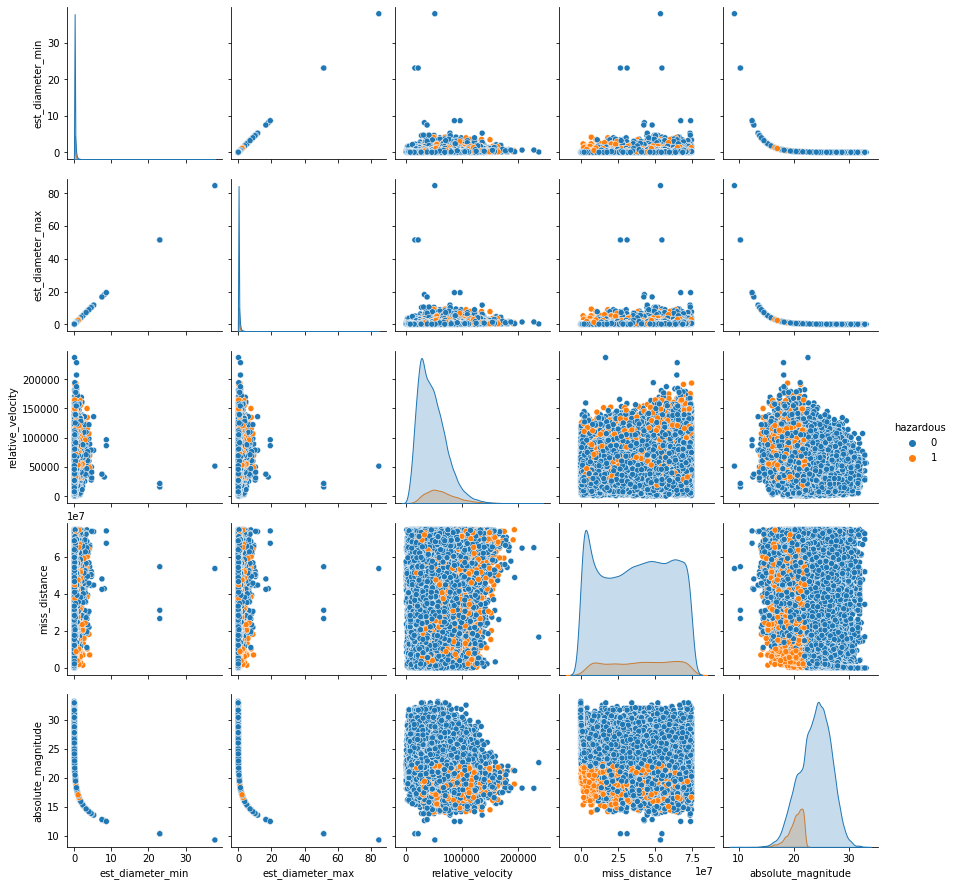

In [38]:
#Explore relationships between variables
sns.pairplot(df,hue='hazardous');

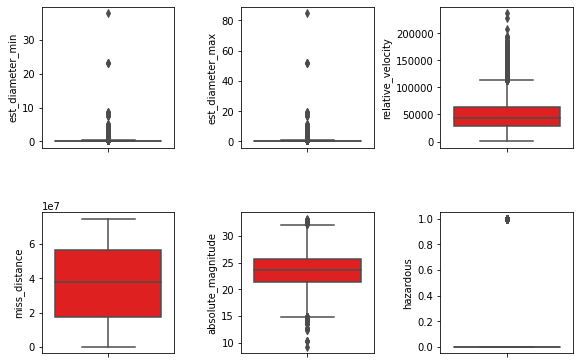

In [39]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(8, 5))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='r', ax=ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad = 0.7, h_pad =5.0)

#### Scaler

In [40]:
scaler = preprocessing.MinMaxScaler()
features = np.array(df.columns[0:-1])
features.astype(str)
for i in features:
  df[i] = scaler.fit_transform(df[[i]])

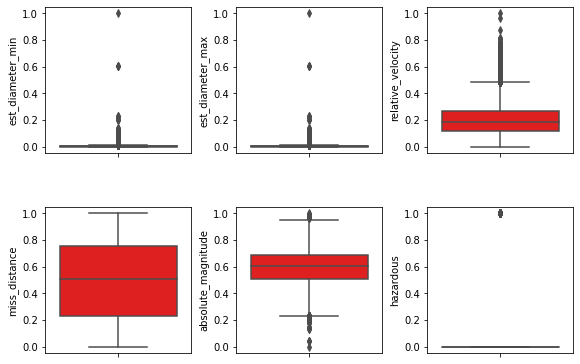

In [41]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(8, 5))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='r', ax=ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad = 0.7, h_pad =5.0)

#### Remove Outliers

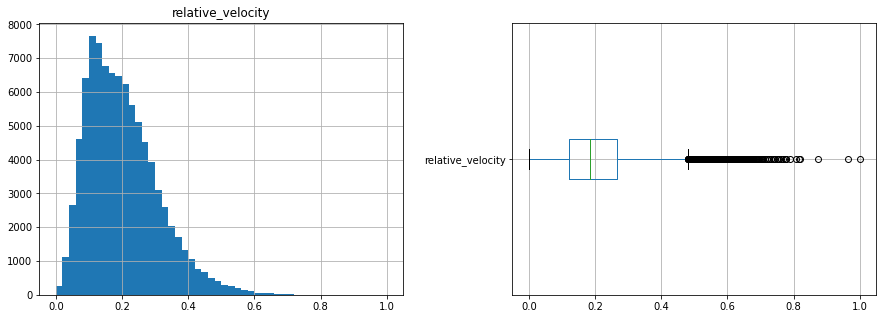

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df[["relative_velocity"]].hist(bins=50, ax=axes[0]);
df[["relative_velocity"]].boxplot(ax=axes[1], vert=False);

In [43]:
def remove_outliers(data):
    data1 = data.copy()
    data = data._get_numeric_data()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
       
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    for col in data.columns:
        for i in range(0, len(data[col])):
            if data[col][i] < lower_bound[col]:
                data[col][i] = lower_bound[col]
            
            if data[col][i] > upper_bound[col]:
                data[col][i] = upper_bound[col]
                
    for col in data.columns:
        data1[col] = data[col]
        
    return (data1)

In [44]:
features = np.array(df.columns[0:-1])
features.astype(str)
for i in features:
  df[i] = remove_outliers(df[[i]])

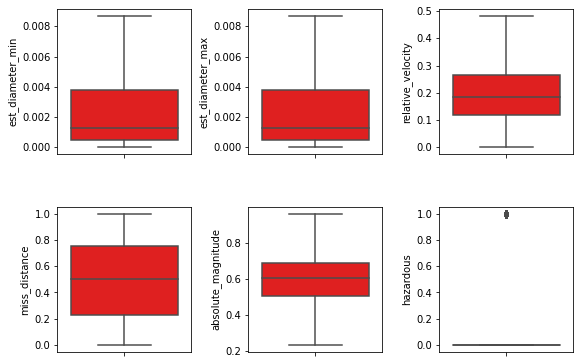

In [45]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(8, 5))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='r', ax=ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad = 0.7, h_pad =5.0)

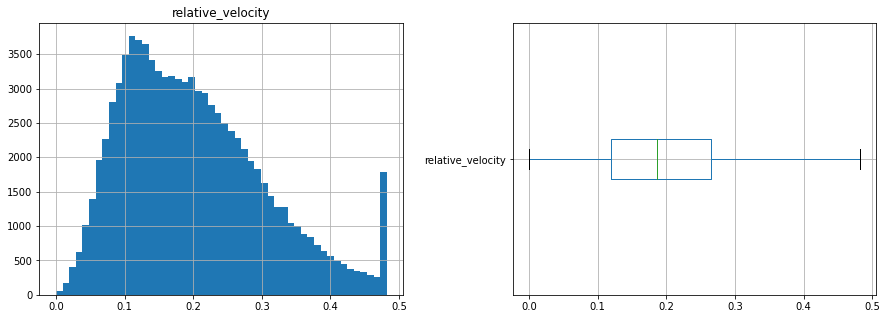

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df[["relative_velocity"]].hist(bins=50, ax=axes[0]);
df[["relative_velocity"]].boxplot(ax=axes[1], vert=False);

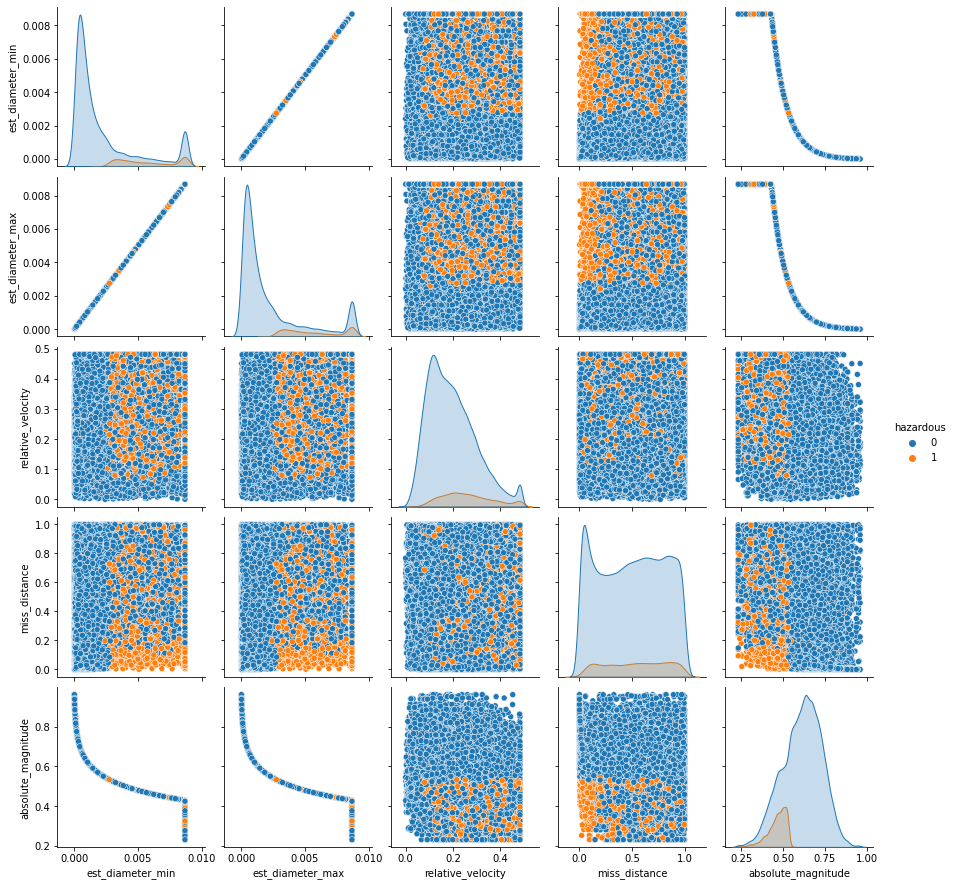

In [ ]:
sns.pairplot(df,hue='hazardous');

In [47]:
#Prepping data for model fitting
X = df.drop('hazardous',axis=1)
y = df['hazardous']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [49]:
print("Trainset: ", X_train.shape, y_train.shape)
print("Testset: ", X_test.shape, y_test.shape)

Trainset:  (72668, 5) (72668,)
Testset:  (18168, 5) (18168,)


In [50]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print(classification_report(y_test,y_pred,zero_division = 0))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     16395
           1       0.30      0.07      0.11      1773

    accuracy                           0.89     18168
   macro avg       0.60      0.53      0.53     18168
weighted avg       0.85      0.89      0.86     18168



In [52]:
nb = BernoulliNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     16395
           1       0.00      0.00      0.00      1773

    accuracy                           0.90     18168
   macro avg       0.45      0.50      0.47     18168
weighted avg       0.81      0.90      0.86     18168



In [53]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)
KNNpreds = KNN.predict(X_test)
print(classification_report(y_test,KNNpreds))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     16395
           1       0.49      0.31      0.38      1773

    accuracy                           0.90     18168
   macro avg       0.71      0.64      0.66     18168
weighted avg       0.89      0.90      0.89     18168



In [54]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     16395
           1       0.63      0.40      0.49      1773

    accuracy                           0.92     18168
   macro avg       0.78      0.69      0.72     18168
weighted avg       0.91      0.92      0.91     18168



In [55]:
lg_pred = lg.predict_proba(X_test)
rf_pred = RF.predict_proba(X_test)
knn_pred = KNN.predict_proba(X_test)

In [56]:
lg_pred = lg_pred[:,1]
rf_pred = rf_pred[:,1]
knn_pred = knn_pred[:,1]

In [57]:
lg_fpr, lg_tpr,thresholds = roc_curve(y_test, lg_pred)
rf_fpr, rf_tpr,thresholds = roc_curve(y_test, rf_pred)
knn_fpr, knn_tpr,thresholds = roc_curve(y_test,knn_pred)

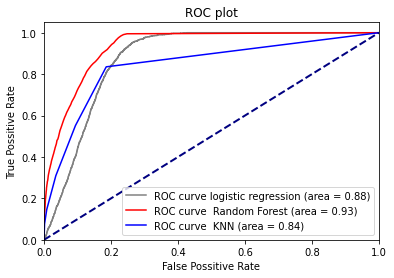

In [58]:
plt.plot(lg_fpr,lg_tpr,c = 'gray', label = 'ROC curve logistic regression (area = %0.2f)' % auc(lg_fpr,lg_tpr))
plt.plot(rf_fpr,rf_tpr,c = 'r', label = 'ROC curve  Random Forest (area = %0.2f)' % auc(rf_fpr,rf_tpr))
plt.plot(knn_fpr,knn_tpr,c = 'b', label = 'ROC curve  KNN (area = %0.2f)' % auc(knn_fpr,knn_tpr))
lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.title('ROC plot')
plt.xlabel('False Possitive Rate')
plt.ylabel('True Possitive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend();